In [14]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt 
%matplotlib inline

In [15]:
gyeongbu_data = pd.read_excel('datasets/Gyeongbu_HSR.xlsx')
gyeongbu_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information
0,KTX,1,05:13:00,07:49:00,02:36:00,"Gwangmyeong, Daejeon, Dongdaegu, Gyeongju, Uls...",59800,44.252,HSR ONLY
1,KTX,3,05:28:00,08:15:00,02:47:00,"Gwangmyeong, Cheonan-Asan, Daejeon, Gimcheon-G...",59800,44.252,HSR ONLY
2,KTX,5,05:58:00,08:42:00,02:44:00,"Gwangmyeong, Cheonan-Asan, Daejeon, Seodaegu, ...",59400,43.956,Seodaegu
3,KTX-Sancheon,75,06:03:00,08:48:00,02:45:00,"Gwangmyeong, Cheonan-Asan, Osong, Daejeon, Gim...",59800,44.252,HSR ONLY
4,KTX,7,06:33:00,09:21:00,02:48:00,"Gwangmyeong, Osong, Daejeon, Gimcheon-Gumi, Do...",59800,44.252,HSR ONLY


In [26]:
hsr_data = pd.read_excel('datasets/HSR_locations.xlsx')
hsr_data.head()

,Station,Lateral Coordinates (yloc),Longitudinal Coordinates (xloc),Station Spacing (km),Lines,Junction,Additional Information
0,Seoul,37.554722,126.970833,0.0,"Gyeongbu, Honam",NaN,NaN
1,Yongsan,37.529788,126.964660,3.2,Honam,NaN,All Gyeongbu PASS
2,Gwangmyeong,37.416051,126.884686,22.0,"Gyeongbu, Honam",NaN,NaN
3,Cheonan-Asan,36.785750,127.102833,74.0,"Gyeongbu, Honam",NaN,NaN
4,Osong,36.627072,127.327287,28.7,"Gyeongbu, Honam","Gyeongbu, Honam",NaN


In [16]:
def convert_to_hours(time_obj):
    # Extract hours and minutes
    hours = time_obj.hour
    minutes = time_obj.minute
    # Convert to total hours
    total_hours = hours + minutes / 60.0
    return round(total_hours,2)

In [17]:
# Apply the conversion function to the 'Travel Time' column and create a new column for hours
gyeongbu_data['Travel Time (Hours)'] = gyeongbu_data['Travel Time (Hours)'].apply(convert_to_hours)

In [19]:
gyeongbu_data['ID'] = range(1, len(gyeongbu_data) + 1)
gyeongbu_data.head()

,Train,Number,Departure Time,Arrival Time,Travel Time (Hours),Stops,Cost (Korean Won),Cost (US Dollars),Additional Information,ID
0,KTX,1,05:13:00,07:49:00,2.60,"Gwangmyeong, Daejeon, Dongdaegu, Gyeongju, Uls...",59800,44.252,HSR ONLY,1
1,KTX,3,05:28:00,08:15:00,2.78,"Gwangmyeong, Cheonan-Asan, Daejeon, Gimcheon-G...",59800,44.252,HSR ONLY,2
2,KTX,5,05:58:00,08:42:00,2.73,"Gwangmyeong, Cheonan-Asan, Daejeon, Seodaegu, ...",59400,43.956,Seodaegu,3
3,KTX-Sancheon,75,06:03:00,08:48:00,2.75,"Gwangmyeong, Cheonan-Asan, Osong, Daejeon, Gim...",59800,44.252,HSR ONLY,4
4,KTX,7,06:33:00,09:21:00,2.80,"Gwangmyeong, Osong, Daejeon, Gimcheon-Gumi, Do...",59800,44.252,HSR ONLY,5


In [20]:
stop_numbers = 0
for i in range(len(gyeongbu_data['Stops'])):
    my_string = gyeongbu_data['Stops'][i]
    my_list = my_string.split(",")
    print(my_list, len(my_list))
    stop_numbers += len(my_list)

['Gwangmyeong', ' Daejeon', ' Dongdaegu', ' Gyeongju', ' Ulsan (Tongdosa)'] 5
['Gwangmyeong', ' Cheonan-Asan', ' Daejeon', ' Gimcheon-Gumi', ' Dongdaegu', ' Gyeongju', ' Ulsan (Tongdosa)'] 7
['Gwangmyeong', ' Cheonan-Asan', ' Daejeon', ' Seodaegu', ' Dongdaegu', ' Ulsan (Tongdosa)'] 6
['Gwangmyeong', ' Cheonan-Asan', ' Osong', ' Daejeon', ' Gimcheon-Gumi', ' Dongdaegu', ' Ulsan (Tongdosa)'] 7
['Gwangmyeong', ' Osong', ' Daejeon', ' Gimcheon-Gumi', ' Dongdaegu', ' Gyeongju', ' Ulsan (Tongdosa)'] 7
['Gwangmyeong', ' Cheonan-Asan', ' Osong', ' Daejeon', ' Dongdaegu', ' Ulsan (Tongdosa)'] 6
['Gwangmyeong', ' Osong', ' Daejeon', ' Dongdaegu'] 4
['Gwangmyeong', ' Daejeon', ' Dongdaegu', ' Gyeongju', ' Ulsan (Tongdosa)'] 5
['Gwangmyeong', ' Cheonan-Asan', ' Daejeon', ' Gimcheon-Gumi', ' Dongdaegu', ' Gyeongju', ' Ulsan (Tongdosa)'] 7
['Yeongdeungpo', ' Suwon', ' Daejeon', ' Dongdaegu', ' Gyeongju', ' Ulsan (Tongdosa)'] 6
['Gwangmyeong', ' Daejeon', ' Dongdaegu'] 3
['Daejeon', ' Dongdaegu'] 2


In [21]:
train_num = len(gyeongbu_data['Stops'])
train_num

58

In [22]:
average_stops = np.round(stop_numbers / train_num)
average_stops

6.0

$ q = \frac{1}{\overline{h}} $

- q is traffic flow measured in vehicles per hour
- $\overline{h}$ is the average headway in hours

In [23]:
# Convert 'Departure Time' and 'Arrival Time' to datetime objects
gyeongbu_data['Departure Time'] = pd.to_datetime(gyeongbu_data['Departure Time'], format='%H:%M:%S')
gyeongbu_data['Arrival Time'] = pd.to_datetime(gyeongbu_data['Arrival Time'], format='%H:%M:%S')

# Calculate the time differences between stops
time_diff = 0
for i in range(len(gyeongbu_data['Departure Time'])-50):
    dep_time = gyeongbu_data['Departure Time'].iloc[i]
    next_dep_time = gyeongbu_data['Departure Time'].iloc[i+1]
    print(f'next: {next_dep_time} current: {dep_time}')
    diff = (next_dep_time - dep_time).total_seconds() / 3600  # Convert seconds to hours
    print(f'diff: {diff*60}')
    time_diff += diff

print(f"Total time difference: {time_diff} hours")

next: 1900-01-01 05:28:00 current: 1900-01-01 05:13:00
diff: 15.0
next: 1900-01-01 05:58:00 current: 1900-01-01 05:28:00
diff: 30.0
next: 1900-01-01 06:03:00 current: 1900-01-01 05:58:00
diff: 5.0
next: 1900-01-01 06:33:00 current: 1900-01-01 06:03:00
diff: 30.0
next: 1900-01-01 06:57:00 current: 1900-01-01 06:33:00
diff: 24.0
next: 1900-01-01 07:28:00 current: 1900-01-01 06:57:00
diff: 31.000000000000004
next: 1900-01-01 07:50:00 current: 1900-01-01 07:28:00
diff: 22.0
next: 1900-01-01 07:58:00 current: 1900-01-01 07:50:00
diff: 8.0
Total time difference: 2.75 hours


In [24]:
average_headway_hours = time_diff / train_num
print(f'Average headway: {np.round(average_headway_hours,3)} hours')
print(f'Average headway: {np.round(average_headway_hours*60,3)} minutes')

Average headway: 0.047 hours
Average headway: 2.845 minutes


In [25]:
q_flow = 1/average_headway_hours
print(f'Average Traffic Flow: {q_flow} trains per hour')

Average Traffic Flow: 21.090909090909093 trains per hour


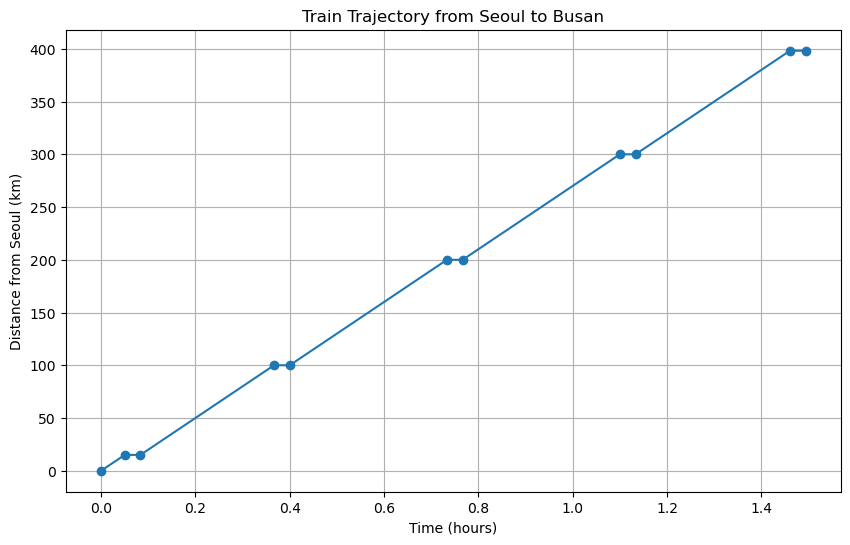

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the stops for the first train
stops = data.loc[0, 'Stops'].split(', ')
stop_distances = [0, 15, 100, 200, 300, 398.2]  # Example distances in km for each stop
total_distance = 398.2
cruise_speed = 300  # km/h
stop_time = 2 / 60  # hours per stop

# Create time and distance lists
time_points = [0]  # Start at time 0
distance_points = [0]  # Start at Seoul (0 km)

current_time = 0

for i in range(1, len(stop_distances)):
    # Calculate travel time to next stop
    travel_time = (stop_distances[i] - stop_distances[i - 1]) / cruise_speed
    current_time += travel_time
    time_points.append(current_time)
    distance_points.append(stop_distances[i])
    
    # Add stop time
    current_time += stop_time
    time_points.append(current_time)
    distance_points.append(stop_distances[i])

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(time_points, distance_points, marker='o')
plt.xlabel('Time (hours)')
plt.ylabel('Distance from Seoul (km)')
plt.title('Train Trajectory from Seoul to Busan')
plt.grid(True)
plt.show()
